Run only if you have saved relevant json data to disk. See main.ipynb

In [1]:
import os
import re
import json
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pp
from collections import Counter
from sentence_transformers import SentenceTransformer
%matplotlib inline
import seaborn as sns
import random
random.seed(4)

c:\Users\woutl\GitHub\FTPortalParser\.venv\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
dirs={}
dirs['project']=os.path.abspath('..')+'\\'
dirs['code']=dirs['project']+'code\\'
dirs['data']=dirs['project']+'data\\'
dirs['models']=dirs['project']+'models\\'
dirs['results']=dirs['project']+'results\\'
dirs['rawresults']=dirs['results']+'raw\\'

In [3]:
with open(dirs['data']+'facets.pkl', 'rb') as f:
    facets=pickle.load(f)
facets.simple = {}
for facet in [f['name'] for f in facets.json().get('facets')]:
    facets.simple[facet] = {p['value']: {'raw': p['rawValue'], 'count': p['count']} for p in [f for f in facets.json().get('facets') if f['name']==facet][0]['values']}

I'm just gonna go and load all the data now. Probably not the smartest thing to do - at least do it per framework programme - but it will suffice for now.

In [4]:
jsons={}
# for programme in facets.simple['frameworkProgramme'].keys():
# for programme in ['Digital Europe Programme (DIGITAL)']:
# for programme in ['Horizon Europe (HORIZON)']:
for programme in ['Horizon Europe (HORIZON)', 'Digital Europe Programme (DIGITAL)']:
    raw=facets.simple['frameworkProgramme'][programme]['raw']
    # jsons[programme]={}
    for j in [f for f in os.listdir(dirs['data']+raw) if f.endswith('.json')]:
        with open(dirs['data']+raw+'\\'+j, 'r') as f:
            jsons[j[:-5]]=json.load(f)

In [5]:
pp(jsons['HORIZON-CL4-2024-HUMAN-03-02'], width=120)

{'TopicDetails': {'type': 0,
                  'ccm2Id': 46950745,
                  'cftId': 0,
                  'identifier': 'HORIZON-CL4-2024-HUMAN-03-02',
                  'title': 'Explainable and Robust AI (AI Data and Robotics Partnership) (RIA)',
                  'publicationDateLong': 1713398400000,
                  'callIdentifier': 'HORIZON-CL4-2024-HUMAN-03',
                  'callTitle': 'A human-centred and ethical development of digital and industrial technologies',
                  'callccm2Id': 46950906,
                  'allowPartnerSearch': True,
                  'frameworkProgramme': {'id': 43108390,
                                         'abbreviation': 'HORIZON',
                                         'description': 'Horizon Europe Framework Programme (HORIZON)'},
                  'programmeDivision': [{'id': 43120218,
                                         'abbreviation': 'HORIZON.2.4.5',
                                         'description': 'Ar

In [6]:
def cleantext(text):
    text = re.sub('<.*?>', ' ', text)
    text = re.sub(' {2,}', ' ', text).strip()
    return text

In [7]:
descriptions={}
# for programme in facets.simple['frameworkProgramme'].keys():
# for programme in ['Digital Europe Programme (DIGITAL)']:
# for programme in ['Horizon Europe (HORIZON)']:
# for programme in ['Horizon Europe (HORIZON)', 'Digital Europe Programme (DIGITAL)']:
    # descriptions[programme]={}
for k,j in jsons.items():
    # print(k)
    if j['TopicDetails'].get('description'):    # apparently some topics lack descriptions, see for instance https://ec.europa.eu/info/funding-tenders/opportunities/portal/screen/opportunities/topic-details/hoirzon-eic-2024-prize-eipa-netzeroprocuremet
        description = j['TopicDetails']['description']

        matches=re.finditer(r'<SPAN class="topicdescriptionkind">(.*?)</SPAN>', description)
        matchdict={}
        for i,m in enumerate(matches):
            matchdict[i]=dict(group=m.group(1), start=m.start(), end=m.end()+1)
        descriptiondict={}
        for i in range(len(matchdict)):
            descriptiondict[matchdict[i]['group']]={}
            if i != (len(matchdict))-1:
                descriptiondict[matchdict[i]['group']]=cleantext(description[matchdict[i]['end']:matchdict[i+1]['start']])
            else:
                descriptiondict[matchdict[i]['group']]=cleantext(description[matchdict[i]['end']:])
            # alternatively, if we do not want to include the header:
            # if i != (len(matchdict))-1:
            #     descriptiondict[matchdict[i]['group']]=cleantext(description[matchdict[i]['end']:matchdict[i+1]['start']])
            # else:
            #     descriptiondict[matchdict[i]['group']]=cleantext(description[matchdict[i]['end']:])

        # descriptions[programme][k]=descriptiondict
        descriptions[k]=descriptiondict
# export or save somehow

In [8]:
list(descriptions.keys())

['ERC-2020-PERA-2',
 'ERC-2021-ADG',
 'ERC-2021-COG',
 'ERC-2021-STG',
 'ERC-2022-ADG',
 'ERC-2022-COG',
 'ERC-2022-PERA-1',
 'ERC-2022-PERA-3',
 'ERC-2022-POC1',
 'ERC-2022-POC2',
 'ERC-2022-STG',
 'ERC-2022-SyG',
 'ERC-2023-ADG',
 'ERC-2023-COG',
 'ERC-2023-POC',
 'ERC-2023-SJI-1',
 'ERC-2023-STG',
 'ERC-2023-SyG',
 'ERC-2024-ADG',
 'ERC-2024-COG',
 'ERC-2024-PERA',
 'ERC-2024-POC',
 'ERC-2024-STG',
 'ERC-2024-SyG',
 'ERC-2025-STG',
 'ERC-2025-SyG',
 'HORIZON-Chips-2024-RIA-CPL-5',
 'HORIZON-CL2-2021-DEMOCRACY-01-01',
 'HORIZON-CL2-2021-DEMOCRACY-01-02',
 'HORIZON-CL2-2021-DEMOCRACY-01-03',
 'HORIZON-CL2-2021-DEMOCRACY-01-04',
 'HORIZON-CL2-2021-DEMOCRACY-01-05',
 'HORIZON-CL2-2021-HERITAGE-01-01',
 'HORIZON-CL2-2021-HERITAGE-01-02',
 'HORIZON-CL2-2021-HERITAGE-01-03',
 'HORIZON-CL2-2021-HERITAGE-01-04',
 'HORIZON-CL2-2021-HERITAGE-02-01',
 'HORIZON-CL2-2021-HERITAGE-02-02',
 'HORIZON-CL2-2021-TRANSFORMATIONS-01-01',
 'HORIZON-CL2-2021-TRANSFORMATIONS-01-02',
 'HORIZON-CL2-2021-TRANS

In [9]:
descriptions['DIGITAL-2021-CLOUD-AI-01-DATA-TECH']

{'ExpectedOutcome': 'Outcome and Deliverables The Secretariat of the Industrial Alliance will support the European Commission in delivering on the following outcomes: A platform for identifying opportunities for leveraging investment and innovation synergies in the research, development and deployment of next generation of resource-efficient, interoperable, highly secure semiconductor technologies . This platform should enhance coherence and synergies across activities in the IPCEIs, the KDT JU, Digital Europe Programme and the Pact for Skills. The European Commission will be an observer to the General Assembly, monitoring progress with a view to its policy and investment agenda and act as a facilitator towards cooperation and engagement of all stakeholders, e.g. by providing secretarial services for the on-boarding of new members',
 'Objective': 'This action is to support the activities of the Industrial Alliance on processors and semiconductor technologies that was announced in the C

In [10]:
test_keys, test_corp, test_titles, test_urls = zip(*[(k, v.get('ExpectedOutcome', ' ') + v.get('Objective', ' ') + v.get('Scope', ' '), re.sub(r'\(.*?\)', '', jsons[k]['TopicDetails']['title']), 'https://ec.europa.eu/info/funding-tenders/opportunities/portal/screen/opportunities/topic-details/'+k.lower()) for k,v in descriptions.items() if (k.startswith('HORIZON-CL') or k.startswith('HORIZON-HLTH') or k.startswith('HORIZON-EUROHPC-JU') or k.startswith('DIGITAL-')) and (v.get('ExpectedOutcome') or v.get('Scope'))])

Alternatively we can try a semantic search model. This is just me fooling around right now.

In [11]:
topsector_text={
    'nl':{
        'Cyber security technologies': 'Cybercriminelen maken gebruik van steeds geavanceerdere technieken om de gedigitaliseerde samenleving binnen te dringen en te ondermijnen. Willen organisaties in de toekomst kunnen blijven vertrouwen op veilige en robuuste ICT-systemen, netwerken en diensten, zullen zij vaker en effectiever gezamenlijk moeten optreden. Door de toenemende afhankelijkheid van computersystemen, netwerken en mobiele apparaten wordt het vakgebied Cyber security technologies steeds belangrijker. Niet in de laatste plaats omdat digitale criminaliteit de sterkst groeiende vorm van economische misdrijven is. Vrijwel dagelijks halen incidenten rondom hacks, datalekken, phising en ransomware het nieuws. Ook in Nederland zijn er al verschillende grote cybersecurity-incidenten geweest met ontwrichtende gevolgen, zoals diverse DDoS-aanvallen op Nederlandse banken, het platleggen van grote containerterminals in de Rotterdamse haven de cyberaanvallen op VDL Groep en de Universiteit van Maastricht, die lange tijd geen onderwijs kon geven door aanvallen van hackers. Vaak is het goed beschermen van systemen, netwerken en apparaten een race tegen de klok: de risicos van morgen zijn weer heel anders dan de risicos van vandaag. Bovendien worden criminelen steeds slimmer op dit vlak. Samenwerking vereist. De BV Nederland is nog onvoldoende wakker geschud voor de risicos van aanvallen op onze digitale systemen. Het gevoel van urgentie ontbreekt vaak, terwijl de risicos dit wel vereisen. De transformatie van de energiesector vraagt bijvoorbeeld om meer aandacht voor Cyber security technologies, net als drinkwatervoorzieningen, waterkeringen of rioleringen en de gezondheidszorg. Als deze sectoren worden getroffen door een aanval, heeft dit direct grote maatschappelijke impact. Soms kunnen de gevolgen zelfs levensbedreigend zijn. Door te investeren in Cyber security technologies kan Nederland zijn digitale infrastructuur beschermen, economische schade verminderen en persoonlijke gegevens beter beveiligen. Daarnaast kunnen we zo kennis en innovatie bevorderen en onze internationale positie versterken. Dit is niet alleen een taak van de overheid, maar vereist ook samenwerking tussen bedrijven, onderzoeksinstellingen en de samenleving als geheel. Alleen door gezamenlijke inspanning kunnen we de uitdagingen die digitalisering met zich meebrengt het hoofd bieden en de voordelen van digitale en informatietechnologieën volledig benutten. Omgaan met risico’s op schade of uitval van digitale systemen en de beschikbaarheid, integriteit en vertrouwelijkheid van gegevens moeten eveneens hoger op de agenda. Ook hier is samenwerking essentieel om deze complexe uitdagingen het hoofd te bieden. Topsector ICT wil, samen met het landelijke ecosysteem dcypher, een einde maken aan de versnipperde aanpak en partijen samenbrengen en verbinden. Het is tijd voor meer actie! Ketenaanpak gewenst. Om Cyber security technologies goed op de radar te krijgen en gezamenlijk te werken aan de juiste aanpak is het platform dcypher opgericht. dcypher richt zich op de gehele keten voor Cyber security technologies en heeft drie belangrijke doelstellingen. Allereerst moet het zorgen voor een toename van expertise en cybersecurity-opleidingen. Verder wil het de Nederlandse kennispositie op het gebied van Cyber security technologies versterken. Tot slot richt het zich op het benutten van de opgedane kennis, zodat de benodigde (financiële) middelen kunnen worden opgehaald.',
        'Artificial Intelligence': 'Artificiële Intelligentie (AI) is al lang geen science fiction meer. AI is overal en heeft een grote impact op ons dagelijks leven. Denk aan virtuele assistenten en chatbots, zoals ChatGPT, Alexa en Siri, slimme games en zelfrijdende autos. Maar ook de zorg, e-commerce en fraudedetectie kunnen niet meer zonder AI. Met de exponentiële groei van computercapaciteit, de grotere beschikbaarheid van data, vooruitgang in slimme AI-algoritmen en meer synergie tussen verschillende disciplines is Artificial Intelligence (AI) in een stroomversnelling gekomen. Kunstmatige Intelligentie speelt een steeds belangrijkere rol bij het oplossen van maatschappelijke en economische vraagstukken en bepaalt in toenemende mate onze welvaart en ons welzijn. Het is een multidisciplinair vakgebied dat impact heeft op alle bedrijfssectoren, maar ook op ons privéleven en de maatschappij. AI kent allerlei vormen en toepassingen: van gezichtsherkenning tot vertaalapps, van fraudebestrijding tot het stellen van betere medische diagnoses of persoonlijke behandelplannen. Daarnaast worden AI-toepassingen al ingezet voor de reductie van het gebruik van pesticiden, energiebesparing, gepersonaliseerd onderwijs, goedkoper onderhoud van wegen, spoorwegen en bruggen en zelfsturende autos, robots en drones. AI beïnvloedt bovendien wat we kopen, kijken of lezen. En dat is nog maar het begin. AI is straks overal. AI is erop gericht gedrag door machines te realiseren dat lijkt op natuurlijke intelligentie. Een leerstrategie bij kunstmatige intelligentie (AI) verwijst naar de methoden en technieken die worden gebruikt om een AI-systeem te trainen of te laten leren. Er zijn verschillende leerstrategieën, afhankelijk van het type AI-algoritme en het specifieke leerdoel: Supervised machine learning. Hierbij is het algoritme in staat te classificeren op basis van bepaalde kenmerken of patronen of voorspellingen te doen op basis van een test dataset en bijbehorende labels. Unsupervised learning. Hierbij categoriseert het algoritme zonder gebruik te maken van bestaande labels. Reinforcement learning. Hierbij leert het algoritme over de beste strategie op basis van interactie met de omgeving. Deep Learning. Deze strategie wordt vaak gebruikt om meer complexe en abstracte problemen op te lossen. Het is een subcategorie van Machine Learning, die zich richt op het bouwen en trainen van diepe neurale netwerken. In toenemende mate worden voor AI hybride vormen ontwikkeld, waarin mens en AI samenwerken. Koploper worden en blijven. Hoewel Nederland een sterke concurrentiepositie heeft als het gaat om AI, staat de rest van de wereld zeker niet stil. In economieën om ons heen wordt de grootschalige ontwikkeling en inzet van AI namelijk sterk gestimuleerd door overheden. Om geen kansen te missen, onze autonomie te behouden en de samenleving niet op te zadelen met technologie die onze belangen niet dient, is het belangrijk dat we blijven investeren in AI-talent, onderzoek en innovatie. Alleen zo kunnen we onze sterke concurrentiepositie behouden en verder versterken. Hiertoe is een integrale aanpak vereist, met intensieve betrokkenheid van de overheid. Om die reden is in 2019 de Nederlandse AI Coalitie (NL AIC) opgezet als een van de coalities onder de paraplu van Topsector ICT. Door het stimuleren van samenwerking en co-creatie tussen verschillende belanghebbenden en het bevorderen van onderzoek en innovatie, speelt de NL AIC een belangrijke rol bij het bevorderen van de ontwikkeling en toepassing van AI in Nederland. Bedrijven, kennisinstellingen, overheden en maatschappelijke organisaties geven samen de AI-agenda van Nederland vorm en jagen Europese samenwerking aan. Zo biedt het een antwoord op de plannen van AI-reuzen als China en de VS, met inachtneming van de Nederlandse en Europese normen en waarden. Doel is binnen drie jaar in tenminste tien economische en maatschappelijke sectoren impactvolle AI-innovaties te realiseren. Er is een meerjarig AiNed-programma opgesteld – een nationaal groeifondsinvesteringsprogramma dat loopt tot en met 2027.',
        'Digital connectivity technologies': 'Communicatienetwerken vormen een drijvende kracht achter de digitalisering van onze samenleving. Ze dragen bij aan economische groei in alle sectoren en vormen een cruciaal onderdeel voor het aangaan van grote maatschappelijke uitdagingen. Nederland is sterk in het inzetten van digitale technologie voor economische en maatschappelijke groei. De afgelopen decennia is naar schatting 20 tot 40 procent van de economische groei in ons land voortgekomen uit telecommunicatie en ICT. Hierbij is een solide en toekomstbestendige ICT-infrastructuur onmisbaar. Digital connectivity technologies, ook wel Future Network Services (FNS) genoemd, zorgt voor een nieuwe generatie draadloze en vaste netwerken die de groeiende vraag naar capaciteit aankunnen en tegelijkertijd robuust en flexibel zijn en efficiënt met energie en materialen omspringen. Ook vanuit applicaties worden steeds meer en hogere eisen gesteld aan deze netwerken. Door de netwerken programmeerbaar te maken kunnen ze optimaal tegemoet komen aan deze eisen. Netwerken in high performance computing moeten beschikken over zeer grote brandbreedte, terwijl voor autonoom rijden en industriële toepassingen minimale vertraging mag optreden (low latency netwerken). En voor bepaalde sectoren, zoals de overheid, de finance en de zorg zijn er vooral strengere eisen als het gaat om de beveiliging. Digital connectivity technologies versmelten digitale diensten met infrastructuur. Dit heeft raakvlakken met andere (sleutel)technologieën, zoals Artificial Intelligence (AI), cloud en Internet of Things (IoT). Strategische autonomie. De nieuwste generatie 6G mobiele netwerken (beschikbaar rond 2030) maken heel snel mobiel internet mogelijk en bieden kansen voor nieuwe digitale diensten en toepassingen voor zowel de overheid als het bedrijfsleven. De ontwikkeling van 6G neemt de vorm aan van een wedloop tussen China, Europa en de Verenigde Staten. Schaalvoordelen in de mobiele industrie zorgen ervoor dat in chips, antennes en netwerkcomponenten slechts enkele spelers wereldwijd dominant zijn. Nederland heeft zijn eigen sterke spelers (zoals NXP in radiocomponenten voor antennes) en in Europa zijn Ericsson en Nokia sterke spelers in netwerken. Maar in de ontwikkeling van 6G worden de kaarten opnieuw geschud. Om geopolitieke risicos te verkleinen en te werken aan onze strategische autonomie is het belangrijk dat Nederland en Europa hun sterktes handhaven en posities opbouwen in gebieden die eerder deels naar Chinese en Amerikaanse bedrijven zijn verschoven.  Voorbeelden van nieuwe toepassingen. Digitale connectivity technologies spelen een belangrijke rol in de transformatie van Nederland op diverse gebieden, waaronder slimme mobiliteit, slimme energienetten, e-health, Smart Cities en blockchaintechnologie. Met behulp van deze sleuteltechnologie kan ons land onder meer efficiencyslagen maken, duurzaamheid bevorderen en het dagelijks leven verbeteren. In het programmavoorstel Future Network Services (FNS) wordt ingezet op leidende toepassingen als transport hubs, operaties op afstand, smart grids, draadloze detectie, de draadloze fabriek, e-commerce-platforms en digitale sport. Deze toepassingen leiden tot nieuwe bedrijvigheid en economische groei in Nederland en daarbuiten. Zo versterkt onze positie als een toonaangevende digitale natie.',
        'Data science, data analytics and data spaces': 'De hoeveelheid gegevens die we produceren, groeit explosief. Alles en iedereen is online: klantgegevens, verkoopdata, medische dossiers, de belastingaangifte… voorbeelden van de enorme berg digitale gegevens die we big data noemen. Data science, analytics and data spaces richt zich op het verzamelen, beheren, ontsluiten, delen en analyseren van data om waarde te creëren. Gegevensverzamelingen die te groot en te weinig gestructureerd zijn om met reguliere databasemanagementsystemen te onderhouden noemen we Big Data. Data science, data analytics and data spaces zijn drie termen die vaak worden gebruikt in het domein van gegevensverwerking en -analyse. Hoewel ze enkele overlappende aspecten hebben, zijn er ook verschillen tussen de begrippen. Data science richt zich op het ontwikkelen van modellen en algoritmen om inzichten uit gegevens te halen, terwijl data analytics zich richt op het verkennen en interpreteren van gegevens om bruikbare informatie te verkrijgen. Data spaces (ook wel data ecosystems genoemd) is een relatief nieuw concept en verwijst naar de infrastructuur en omgeving waarin gegevens kunnen worden opgeslagen, gedeeld en geanalyseerd. Het data ecosysteem bevat gecentraliseerde en gedistribueerde data bases en oplossingen voor het delen van data. Bij deze zogeheten federatieve (of gedistribueerde) oplossingen worden de gegevens en taken verdeeld over meerdere systemen, servers of organisaties, waarbij elk deel zijn eigen verantwoordelijkheid heeft en bijdraagt aan het grotere geheel. Dit biedt voordelen op het gebied van schaalbaarheid, veerkracht en privacybescherming. Data moet FAIR zijn. Voor analyse en waarde-creatie moet de data FAIR zijn (een acroniem voor Finadable, Accessible, Interoperable en Reusable). Dit is een set principes en richtlijnen die zijn ontwikkeld om de kwaliteit en het hergebruik van data te verbeteren. Daarnaast moeten er afspraken worden gemaakt over gebruik, toegang en waarde van de data. Gegevens kunnen zeer heterogeen zijn, gestructureerd of ongestructureerd, statisch of dynamisch. Met behulp van de geëxtraheerde waarden kunnen voorspellingen worden gedaan, geautomatiseerde beslissingen worden genomen en modellen en visualisaties worden opgesteld die meer inzicht geven in de data. Belangrijke toepassingen. Grote, complexe datasets hebben impact op vrijwel alle sectoren van de samenleving, zoals het bedrijfsleven, de overheid, het onderwijs en de zorg. Uit steeds meer slimme apparaten thuis, op kantoor, in de auto, of op ons lichaam (via sensoren en wearables), stromen gigantische hoeveelheden data binnen. Om iets te kunnen met die gegevens moeten er complexe analyses plaatsvinden met de juiste tools. Organisaties kunnen zo steeds makkelijker uw gedrag voorspellen en beïnvloeden. Dat biedt aanzienlijke voordelen, maar er kleven ook risico’s aan, zoals de kans op privacyschending of filterbubbels. Twee Europese wetten - de Digital Markets Act (DMA) en de Digital Services Act (DSA) – die in 2023 in werking zijn getreden leggen grote technologiebedrijven strengere regels op bij het verzamelen en bewaren van data. Kansen beter benutten. Data science, data analytics and data spaces spelen een grote rol in de innovatie van diensten, producten en werkprocessen. Dankzij het slim verzamelen en inzetten van data wordt de Nederlandse economische groei versterkt. Commerciële bedrijven krijgen meer inzicht in het (koop)gedrag van hun klanten en consumenten krijgen bijvoorbeeld zorg, onderwijs of aanbiedingen op maat. Gemeentes of de politie zetten deze sleuteltechnologie in om beleid te maken of om risico’s in te kunnen schatten. Ook de wetenschap en journalistiek maken veelvuldig gebruik van data science, -analytics and -spaces. Het verwerven van data brengt steeds grotere uitdagingen met zich mee op het gebied van veilige opslag en het delen en analyseren van data. Deze uitdagingen gelden voor alle sectoren. Om de kansen van Big Data optimaal te benutten en de transitie te maken naar een slimmere, datagedreven economie, is nieuwe expertise vereist. Commit2Data assisteert organisaties hierbij. Slimme toepassingen voor topsectoren. Om het gebruik van Big Data verder te ontwikkelen, is Commit2Data in het leven geroepen. Commit2Data is een meerjarig nationaal onderzoeks- en innovatieprogramma op basis van publiek-private samenwerking. Het programma werkt over de sectoren heen samen aan datavraagstukken, maar er zijn ook sectorspecifieke programma’s opgezet. Commit2Data heeft als doel slimme ICT-oplossingen te ontwikkelen voor vraagstukken op het gebied van data science, -analytics and -spaces, die kunnen worden toegepast binnen een groeiend aantal (Top)sectoren. Van Energy en Life Sciences & Health tot Safety & Security.',
        'Software technologies and computing': 'Software technologies, zoals blockchain, cloud-, edge-, grid-, high performance- en mobile computing, gaan de toekomst veranderen. Deze sleuteltechnologie richt zich op het ontwikkelen van methoden en technieken om software maximaal bruikbaar en betrouwbaar te laten zijn. Daarnaast worden er steeds hogere eisen gesteld aan programmeertalen en testomgevingen. Nepnieuws, datalekken, goederenstromen die stilvallen… Digitale systemen zijn steeds vaker kritieke systemen. Deze complexe systemen moeten robuust en tegelijkertijd wendbaar, veilig, verifieerbaar en voor iedereen toegankelijk zijn. Software technologies and computing omvatten een breed scala aan toepassingen, tools en systemen die worden gebruikt om software te ontwikkelen, beheren en gebruiken. Denk aan programmeertalen, frameworks voor softwareontwikkeling, databasesystemen en cloud computing. Hierbij zijn er ook raakvlakken met andere sleuteltechnologieën, waaronder Artificial Intelligence (AI) en Digital Connectivity Technologies. Blockchain is misschien wel het bekendste voorbeeld van de sleuteltechnologie Software technologies and computing. Simpel gesteld is blockchain een nieuw soort database, waarin transacties decentraal worden bijgehouden. Alle informatie wordt versleuteld opgeslagen met behulp van cryptografie, verspreid over een computernetwerk met meerdere knooppunten (nodes). De blokjes informatie worden digitaal ondertekend door alle betrokken partijen – zonder tussenkomst van een derde partij. Doordat een blokje altijd informatie bevat over het vorige blokje, ontstaat er een lange, niet te kraken informatieketting. Alle wijzigingen in de database worden automatisch gekopieerd naar alle computers. Wel zo veilig bij hacks of stroomuitval. Bovendien kan niemand op eigen houtje informatie opslaan of wijzigen in de database, waardoor kwaadwillenden buitenspel staan. Iedereen die de open technologie beheerst kan zelf een eigen blockchain-database bouwen voor zijn eigen toepassing. De technologie kan zowel een grote bijdrage leveren aan de economie als aan het oplossen van maatschappelijke problemen. Een decentrale database kan bijvoorbeeld gegevens bevatten over betalingen met digitale valuta, zoals bitcoin, maar ook patiëntgegevens en smart contracts in de zorg, of verkiezingsuitslagen. Ook contracten, diplomas en eigendomsbewijzen kunnen op die manier op een veilige manier worden gedeeld. Oneindig veel toepassingsgebieden. Software technologies and computing kennen een breed toepassingsgebied en bieden kansen voor vrijwel iedere sector. Steeds meer organisaties en bedrijven verkennen inmiddels de mogelijkheden. De sleuteltechnologie helpt bijvoorbeeld om data veiliger op te slaan, transacties betrouwbaarder te maken en stimuleert decentrale samenwerking. Processen worden bovendien slimmer en efficiënter, waardoor de kosten worden teruggedrongen.Blockchain en andere softwaretechnologieën en computing maken een betere digitale samenleving mogelijk. Decentrale systemen zijn het fundament voor schaalbare samenwerking in complexe vraagstukken zoals de energietransitie, veiligheid of mobiliteit. Lees de succesverhalen uit de volgende toepassingsgebieden: Mobiliteit, Energie & Duurzaamheid, Veiligheid, Gezondheid & Zorg en Landbouw, Water & Voedsel. Daarnaast zijn er use cases over onder meer het Ondernemingspaspoort, Career Wallet, het eerste afgeronde internationale blockchainproject binnen het pensioendomein Mijnwaardeoverdracht en verschillende pilots op het gebied van Blockchain & Mobility. Laat u inspireren!',
        'Neuromorphic technologies': 'Neuromorphic technologies gaan een nieuwe revolutie teweegbrengen in de digitale wereld. Deze sleuteltechnologie, ook wel cognitive computing genoemd, neemt de architectuur en de rekenkracht van onze hersenen als voorbeeld bij het ontwerp van computerchips en bijbehorende softwarealgoritmes. Dit zorgt ervoor dat we complexe taken sneller en efficiënter kunnen uitvoeren. Dit opent nieuwe mogelijkheden voor onder meer Artificial Intelligence, sensortechnologie en gegevensverwerking. Neuromorphic technologies wordt ook wel gezien als de toekomst van Artificial Intelligence (eveneens een sleuteltechnologie van Topsector ICT). In de afgelopen decennia heeft AI enorme vooruitgang geboekt, waardoor machines steeds beter in staat zijn om menselijke taken uit te voeren. Neuromorphic technologies belooft deze vooruitgang verder te versnellen, doordat we nu ook elektronische systemen kunnen ontwerpen die net zo werken als het menselijke brein. Chips met een biologische, neuromorphic architectuur kunnen niet alleen exascale computing (een nieuwe generatie geavanceerde computersystemen) dichterbij brengen, maar zijn ook efficiënter qua ruimte, energie, materiaalgebruik, kosten en milieu-impact. Neuromorphic technologies zijn in het bijzonder geschikt voor patroonherkenning, Machine Learning, creatieve processen en redenatie. En dat alles op een manier die meer lijkt op menselijke intelligentie (vergelijkbaar met onze rechterhersenhelft), waardoor informatie efficiënter kan worden verwerkt. Belangrijke toepassingsgebieden van neuromorphic technologies. Er is een aantal veelbelovende toepassingen van neuromorphic technologies, waaronder het bestrijden van virussen en ziektes, brain-computer interfaces, genetische modificatie, cybernetics, mind augmentation en software neural networks. De toepassingsgebieden van neuromorphic technologies zijn grofweg op te delen in drie categorieën: Machine Vision. Neuromorphic technologies kunnen de prestaties van visuele systemen aanzienlijk verbeteren. Machines kunnen beelden en videos begrijpen, objecten herkennen, scènes analyseren en zelfs emoties detecteren. Dit opent de deur naar innovatieve toepassingen op het gebied van autonome voertuigen, bewakingssystemen, robotica en augmented reality. Natural Language Processing (NLP). Dankzij neuromorphic technologies kunnen machines natuurlijke taal begrijpen en genereren, wat implicaties heeft voor onder meer spraakherkenning, vertaaldiensten en chatbots. Machines kunnen menselijke taal ook beter interpreteren en adequaat reageren, waardoor communicatie tussen mens en machine vloeiender wordt. Neuromorphic Engineering. Neuromorphic technologies stimuleren ook de ontwikkeling van nieuwe hardware- en software-architecturen. Zo ontstaan energie-efficiënte systemen die complexe taken aankunnen. Neuromorphic chips kunnen direct neurale netwerken simuleren en worden toegepast voor snelle data-analyse, Internet of Things (IoT) en in de medische sector. Sterke uitgangspositie voor Nederland. Nederland wil zich profileren als een voorloper op het gebied van neuromorphic technologies. Door slim gebruik te maken van de principes van de hersenen en het zenuwstelsel wil het technologische vooruitgang, belangrijks duurzaamheidsvoordelen en een betere concurrentiepositie bewerkstelligen. De uitgangspositie van Nederland is sterk vanwege de uitstekende academische reputatie op het gebied van kunstmatige intelligentie, neurowetenschappen en computational modeling (complexe systemen simuleren en bestuderen met behulp van wiskunde, natuurkunde en computerwetenschap). Er werken veel getalenteerde onderzoekers en docenten bij Nederlandse universiteiten en onderzoeksinstellingen, die baanbrekend werk verrichten in neuromorphic computing. Daarnaast heeft Nederland een sterke traditie van publiek-private samenwerkingen op het gebied van digitalisering en informatietechnologie.',
        'Digital Twinning and Immersive technologies': 'Eén van de meest opwindende en veelbelovende ontwikkelingen in onze steeds veranderende en digitaliserende wereld is de combinatie van Digital Twinning en Immersive Technologies. Deze krachtige combinatie heeft de potentie om de manier waarop we ontwerpen, produceren, leren en communiceren te transformeren. De technologieën spelen dan ook een cruciale rol bij het stimuleren van innovatie en vooruitgang. Digital Twinning is een geavanceerde technologie waarbij een digitaal model wordt gemaakt van een object, proces of systeem. Deze digitale kopie is een virtuele representatie die real-time informatie en gegevens kan verzamelen en analyseren van het echte object. Zo ontstaat een beter inzicht in hoe het object werkt en presteert. Door gebruik te maken van Digital Twinning kunnen organisaties verbeteringen in kaart brengen en efficiënter werken. Digital twins ontwikkelen zich steeds vaker tot interactieve en dynamische systemen die bijvoorbeeld processen kunnen aan- of bijsturen. Immersive technologies dompelen je onder in een virtuele wereld, zoals Virtual Reality (VR) en Augmented Reality (AR), waarmee je interactief kunt communiceren met een digitale omgeving. Mixed Reality (MR) combineert elementen van VR en AR, waarbij digitale objecten worden geïntegreerd in de echte omgeving. Met deze technologieën ontdek je nieuwe werelden, kan je virtuele objecten manipuleren en beleef je realistische ervaringen. Digital Twinning en Immersive Technologies hebben een nauwe relatie met elkaar. Immersive Technologies kunnen worden gebruikt om toegang te krijgen tot en interactie te hebben met de digitale tweelingen die zijn gecreëerd met behulp van Digital Twinning. Ervaringen worden steeds realistischer door het virtueel samenbrengen van beeld, geluid en zelfs aanraking. Belangrijke toepassingsgebieden van Digital Twinning. De toepassingsgebieden van Digital Twinning zijn legio en breiden zich steeds verder uit. Hieronder sommen we een aantal belangrijke toepassingsgebieden op: Industriële optimalisatie. Door digitale tweelingen (digital twins) van fabrieken, machines en processen te creëren, kunnen bedrijven de prestaties en efficiëntie verbeteren. Dit resulteert in een verminderde downtime, geoptimaliseerde processen en kostenbesparingen. Stedelijke planning. Digital Twinning kan planologen en beleidsmakers helpen om de impact van infrastructuurprojecten, verkeersstromen, energiebeheer en milieu-impact beter te begrijpen. Hierdoor kunnen simulaties worden uitgevoerd en beslissingen worden genomen op basis van data in plaats van onderbuikgevoel. Gezondheidszorg en Life Science. Door Digital Twinning toe te passen in de zorg en life science worden gepersonaliseerde behandelingen mogelijk. Digital twins van patiënten kunnen artsen bijvoorbeeld helpen bij het voorspellen van de reactie op medicijnen, het plannen van chirurgische ingrepen, het optimaliseren van zorgprocessen en het geven van gepersonaliseerd leefstijladvies. Belangrijke toepassingsgebieden van Immersive technologies. De belangrijkste toepassingen van Immersive technologies van dit moment zijn: Training en Simulatie. Immersive Technologies stellen professionals in staat om complexe taken en procedures te oefenen in een veilige en gecontroleerde virtuele omgeving. Dit is vooral waardevol in sectoren zoals de luchtvaart, de gezondheidszorg en de bouw, waar realistische training essentieel is en fouten hoge kosten met zich meebrengen of grote gevolgen kunnen hebben – soms zelfs levensbedreigende. Design en Prototyping. Dankzij Immersive Technologies kunnen ontwerpers en ingenieurs hun concepten visualiseren en interactief verkennen voordat ze fysieke prototypes bouwen. Dit versnelt het ontwerpproces, vermindert kosten en maakt snellere iteraties mogelijk. Toerisme en Entertainment. Door Immersive Technologies ontstaan er nieuwe mogelijkheden voor interactieve ervaringen in de toeristische en entertainmentindustrie: van virtuele reizen naar verre bestemmingen tot meeslepende games. Met behulp van de technologieën dompel je je onder in boeiende en spannende virtuele werelden. Digital Twinning en Immersive technologies versterken elkaar bovendien. Door deze technologieën te combineren ontstaan er interessante mogelijkheden voor het verbeteren van prestaties, het doorvoeren van efficiëntie en innovatie. Sterke uitgangspositie voor Nederland. Nederland staat bekend om zijn innovatieve geest, technologische expertise en ondernemerschap. Het omarmen van Digital Twinning en Immersive Technologies biedt ons land nieuwe kansen en voordelen. Het levert concurrentievoordeel op in bovengenoemde sectoren en het maakt Nederlandse bedrijven aantrekkelijker voor internationale klanten en investeerders. De technologieën helpen Nederland bovendien bij het optimaliseren van de infrastructuur, energiebeheer en stadsplanning, waardoor duurzame ontwikkeling wordt bevorderd. Het verminderen van resourceverspilling en het efficiënter maken van processen draagt bij aan de inspanningen op het gebied van milieubescherming en klimaatverandering. Tot slot kan Nederland een bloeiend innovatie-ecosysteem stimuleren, wat leidt tot nieuwe startups, publiek-private samenwerkingsverbanden en een levendige community van onderzoekers en ontwikkelaars.',
    },
    'en':{
        'Artificial Intelligence': 'With the exponential growth of computing power, greater availability of data, advances in smart AI algorithms and more synergy between different disciplines, Artificial Intelligence (AI) has gone into overdrive. Artificial Intelligence is playing an increasingly important role in solving social and economic issues and is increasingly a determining factor in terms of our prosperity and well-being. It is a multidisciplinary field that impacts all business sectors, as well as our private lives and society. AI has many forms and applications: from facial recognition to translation apps, from fighting fraud to making better medical diagnoses or personalised treatment plans. AI applications are also already being used for pesticide use reduction, energy conservation, personalised education, cheaper maintenance of roads, railways and bridges, and self-driving cars, robots and drones. AI additionally influences what we buy, watch or read. And thats just the beginning. AI will soon be everywhere. AI aims to realise behaviour by machines that resembles natural intelligence. A learning strategy in artificial intelligence (AI) refers to the methods and techniques used to train or teach an AI system. There are different learning strategies, depending on the type of AI algorithm and the specific learning objective: Supervised machine learning is when an algorithm is able to classify based on certain features or patterns or make predictions based on a test dataset and associated labels. Unsupervised learning is when an algorithm categorises without using existing labels. Reinforcement learning is when an algorithm learns about the best strategy based on interaction with the environment. Deep Learning is often used to solve more complex and abstract problems. It is a subcategory of Machine Learning, which focuses on building and training deep neural networks. Although the Netherlands has a strong competitive position when it comes to AI, the rest of the world is certainly not standing still. Indeed, in economies around us, the large-scale development and deployment of AI is being strongly encouraged by governments. To avoid missing opportunities, preserve our autonomy and not saddle society with technology that does not serve our interests, it is important that we continue to invest in AI talent, research and innovation. This is the only way to maintain and further strengthen our strong competitive position. To this end, an integrated approach is required, with intensive government involvement. For this reason, the Dutch AI Coalition (NL AIC) was set up in 2019 as one of the coalitions under the umbrella of top sector ICT. By fostering cooperation and co-creation among various stakeholders and promoting research and innovation, the NL AIC plays an important role in promoting the development and application of AI in the Netherlands. Together, companies, knowledge institutions, governments and civil society organisations are shaping the Netherlands AI agenda and driving European cooperation. It thus offers a response to the plans of AI giants like China and the US, while respecting Dutch and European norms and values. The aim is to achieve impactful AI innovations in at least 10 economic and social sectors within three years. A multi-year AiNed programme has been drawn up - a national growth fund investment programme that will run until 2027.',
        'Cyber security technologies': 'With the increasing dependence on computer systems, networks and mobile devices, the field of cyber security technologies is becoming increasingly important. Not least because digital crime is the strongest growing form of economic crime. Almost daily, incidents surrounding hacks, data breaches, phishing and ransomware make the news. The Netherlands too has already seen several major cyber security incidents with disruptive consequences, such as various DDoS attacks on Dutch banks, the crippling of large container terminals in the port of Rotterdam, the cyber attacks on VDL Groep and the University of Maastricht, which was unable to provide education for a long time due to hacker attacks. Often, properly protecting systems, networks and devices is a race against time: tomorrows risks will be very different from todays risks. Moreover, criminals are getting smarter in this area. The business community in the Netherlands has not yet sufficiently woken up to the risks of attacks on our digital systems. A sense of urgency is often lacking, even though the risks require it. For example, more attention needs to be paid to Cyber security technologies in the context of the transformation of the energy sector, and this is also the case for drinking water supplies, water or sewage systems and healthcare. If these sectors are affected by an attack, it will have an immediate major social impact. Sometimes the consequences can even be life-threatening. By investing in Cyber security technologies, the Netherlands can protect its digital infrastructure, reduce economic damage and better secure personal data. It also allows us to promote knowledge and innovation and strengthen our international position. This is not only a task for the government, but also requires cooperation between companies, research institutions and society as a whole. Only through joint efforts can we meet the challenges posed by digitisation and fully reap the benefits of digital and information technologies. Dealing with risks of damage or failure of digital systems and the availability, integrity and confidentiality of data should also be higher on the agenda. Again, cooperation is essential to meet these complex challenges. Topsector ICT, together with the national ecosystem dcypher, wants to end the fragmented approach and bring parties together and connect them. It is time for more action! To get Cybersecurity properly on the radar and work collectively to get it right, dcypher has been established. This platform focuses on the entire Cybersecurity chain and has three main objectives. First, it should ensure an increase in expertise and cybersecurity training. Furthermore, it aims to strengthen the Dutch knowledge position in the field of Cybersecurity. Finally, it focuses on valorising the knowledge gained so that the necessary (financial) resources can be raised. The platform dcypher was established to get Cyber security technologies properly on the radar and work together to get it right. dcypher focuses on the entire chain for Cyber security technologies and has three main objectives. First, it aims to ensure an increase in expertise and cybersecurity training. It also aims to strengthen the Dutch knowledge position in the field of cyber security technologies. Finally, it focuses on leveraging the knowledge gained so that the necessary (financial) resources can be raised.',
        'Data science, data analytics and data spaces': 'The amount of data we all produce is exploding as everything and everyone is online. Customer data, sales data, medical records, tax returns... all examples of the huge mountain of digital data we refer to as big data. Data science, data analytics and data spaces focus on collecting, managing, accessing, sharing and analysing data to create value. The Commit2Data programme was created to discover new business models and opportunities around data. Data collections that are too large and unstructured to maintain with regular database management systems are referred to as Big Data. Data science, data analytics and data spaces are three terms often used in the field of data processing and analysis. While they have some overlapping aspects, there are also differences between the concepts. While data science focuses on developing models and algorithms to extract insights from data, data analytics focuses on exploring and interpreting data to obtain usable information. Data spaces (also called data ecosystems) is a relatively new concept and refers to the infrastructure and environment in which data can be stored, shared and analysed. The data ecosystem includes centralised and distributed databases and data sharing solutions. In these so-called federated (or distributed) solutions, data and tasks are shared across multiple systems, servers or organisations, with each part having its own responsibility and contributing to the bigger picture. This offers advantages in terms of scalability, resilience and privacy protection. For analysis and value creation, the data must be FAIR (an acronym for Findadable, Accessible, Interoperable and Reusable). This is a set of principles and guidelines developed to improve data quality and reuse. In addition, agreements should be made on use, access and value of the data. Data can be very heterogeneous, structured or unstructured, static or dynamic. Using the extracted values, predictions can be made, automated decisions can be taken and models and visualisations can be created that provide more insight into the data. Large, complex datasets impact virtually all sectors of society, such as business, government, education and healthcare. More and more smart devices at home, in the office, in the car, or on our bodies (via sensors and wearables) are generating huge amounts of data. In order to do something with that data, complex analysis must take place with the right tools. Organisations can thus predict and influence your behaviour increasingly easily. This offers significant advantages, but there are also risks, such as the possibility of privacy breaches or filter bubbles. Two European laws - the Digital Markets Act (DMA) and the Digital Services Act (DSA) - that came into force in 2023 impose stricter data collection and retention rules on large technology companies. Data science, data analytics and data spaces play a major role in the innovation of services, products and work processes. Smart data collection and deployment will strengthen Dutch economic growth. Commercial companies will get more insight into their customers (buying) behaviour and consumers will get, for example, customised healthcare, education or offers. Municipalities or the police can use this key technology to make policy or assess risks. Science and journalism can also make extensive use of data science, data analytics and data spaces. Acquiring data poses increasing challenges in terms of secure storage and sharing and analysis of data. These challenges apply to all sectors. Making the most of the opportunities offered by Big Data and making the transition to a smarter, data-driven economy requires new expertise. Commit2Data assists organisations in this regard.',
        'Digital connectivity technologies': 'The Netherlands is a leader in leveraging digital technology for economic and societal growth. In recent decades, an estimated 20 to 40 per cent of our countrys economic growth has arisen from telecommunications and ICT. A solid and future-proof ICT infrastructure is indispensable in this respect. Digital connectivity technologies, also known as Future Network & Services (FNS), is creating a new generation of wireless and fixed networks that can handle the growing demand for capacity while being robust, flexible and efficient with energy and materials. There are also increasing and higher demands on these networks from applications. By making the networks programmable, they can best meet these requirements. Networks in high-performance computing must have very high bandwidth, while for autonomous driving and industrial applications, minimal delay is allowed (low latency networks). And for certain sectors, such as government, finance and healthcare, there are especially stricter requirements when it comes to security. Digital connectivity technologies merge digital services with infrastructure. This interfaces with other (key) technologies, such as Artificial Intelligence (AI), cloud and Internet of Things (IoT). The latest generation of 6G mobile networks (available around 2030) will enable very fast mobile internet and provide opportunities for new digital services and applications for both government and business. The development of 6G is taking the form of a race between China, Europe and the United States. Economies of scale in the mobile industry mean that in chips, antennas and network components, only a few players are dominant globally. The Netherlands has its own strong players (such as NXP in radio components for antennas) and in Europe, Ericsson and Nokia are strong players in networks. But in the development of 6G, the cards are being reshuffled. To mitigate geopolitical risks and work towards our strategic autonomy, it is important for the Netherlands and Europe to maintain their strengths and build positions in areas that had previously shifted partly to Chinese and US companies. Digital connectivity technologies play an important role in transforming the Netherlands in several areas, including smart mobility, smart energy grids, e-health, Smart Cities and blockchain technology. Using this key technology, our country can make efficiency gains, promote sustainability and improve daily life, among other things. The programme proposal Future Network Services (FNS) focuses on leading applications such as transport hubs, remote operations, smart grids, wireless detection, the wireless factory, e-commerce platforms and digital sports. These applications lead to new business and economic growth in the Netherlands and abroad. This is how we strengthen our position as a leading digital nation and work towards progress. ',
        'Digital Twinning and Immersive technologies': 'One of the most exciting and promising developments in our ever-changing and digitising world is the combination of Digital Twinning and Immersive Technologies. This powerful combination has the potential to transform the way we design, produce, learn and communicate. These technologies therefore play a crucial role in driving innovation and progress. The application areas of Digital Twinning are numerous and ever-expanding. Below, we list some key application areas: Industrial optimisation:  By creating digital twins of factories, machines and processes, companies can improve performance and efficiency. This results in reduced downtime, optimised processes and cost savings. Urban planning:  Digital Twinning can help planners and policymakers better understand the impact of infrastructure projects, traffic flows, energy management and environmental impact. This allows simulations and decisions to be made based on data rather than gut feeling. Healthcare and Life Science:  The application of Digital Twinning in healthcare and life science enables personalised treatments. Digital twins of patients can, for example, help doctors predict response to medication, plan surgical procedures, optimise care processes and provide personalised lifestyle advice. The main applications of Immersive technologies today are: Training and Simulation:  Immersive Technologies enable professionals to practise complex tasks and procedures in a safe and controlled virtual environment. This is especially valuable in sectors such as aviation, healthcare and construction, where realistic training is essential and mistakes carry high costs or can have major consequences - sometimes even life-threatening ones. Design and Prototyping:  Immersive Technologies allow designers and engineers to visualise and interactively explore their concepts before building physical prototypes. This speeds up the design process, reduces costs and enables faster iterations. Tourism and Entertainment:  Immersive Technologies are opening up new opportunities for interactive experiences in the tourism and entertainment industry: from virtual travel to faraway destinations to immersive games. Using the technologies, immerse yourself in captivating and exciting virtual worlds. Digital Twinning and Immersive technologies also reinforce each other. Combining these technologies creates exciting opportunities for improving performance, implementing efficiency and innovation. The Netherlands is known for its innovative spirit, technological expertise and entrepreneurship. Embracing Digital Twinning and Immersive Technologies offers our country new opportunities and benefits. It provides competitive advantages in the above sectors and makes Dutch companies more attractive to international customers and investors. The technologies also help the Netherlands optimise infrastructure, energy management and urban planning, thereby promoting sustainable development. Reducing resource waste and making processes more efficient contributes to environmental protection and climate change efforts. Finally, the Netherlands can foster a thriving innovation ecosystem, leading to new startups, public-private partnerships and a vibrant community of researchers and developers.',
        'Neuromorphic technologies': 'Neuromorphic technologies are also seen as the future of Artificial Intelligence (also a key technology of Topsector ICT). In recent decades, AI has made huge advances, making machines increasingly capable of performing human tasks. Neuromorphic technologies promises to further accelerate this progress, as we can now design electronic systems that work just like the human brain. Chips with a biological, neuromorphic architecture can not only bring exascale computing (a new generation of advanced computing systems) closer, but are also more efficient in terms of space, energy, material use, cost and environmental impact. Neuromorphic technologies are particularly suited to pattern recognition, Machine Learning, creative processes and reasoning. And all in a way that more closely resembles human intelligence (similar to our right brain), allowing information to be processed more efficiently. There are a number of promising applications of neuromorphic technologies, including fighting viruses and diseases, brain-computer interfaces, genetic modification, cybernetics, mind augmentation and software neural networks. The application areas of neuromorphic technologies can be broadly divided into three categories: Machine Vision:  Neuromorphic technologies can significantly improve the performance of visual systems. Machines can understand images and videos, recognise objects, analyse scenes and even detect emotions. This opens the door to innovative applications in autonomous vehicles, surveillance systems, robotics and augmented reality. Natural Language Processing (NLP):  Neuromorphic technologies allow machines to understand and generate natural language, which has implications for speech recognition, translation services and chatbots, among others. Machines can also better interpret human language and respond appropriately, making communication between humans and machines more fluid. Neuromorphic engineering:  Neuromorphic technologies are also driving the development of new hardware and software architectures. This creates energy-efficient systems that can handle complex tasks. Neuromorphic chips can directly simulate neural networks and are applied for high-speed data analysis, Internet of Things (IoT) and in the medical sector. The Netherlands aims to establish itself as a forerunner in neuromorphic technologies. By cleverly using the principles of the brain and nervous system, it aims to bring about technological advances, significant sustainability benefits and improved competitiveness. The Netherlands starting position is strong because of its excellent academic reputation in artificial intelligence, neuroscience and computational modelling (simulating and studying complex systems using mathematics, physics and computer science). Many talented researchers and teachers work at Dutch universities and research institutes, doing pioneering work in neuromorphic computing. In addition, the Netherlands has a strong tradition of public-private partnerships in digitalisation and information technology.',
        'Software technologies and computing': 'Fake news, data breaches, goods flows grinding to a halt... Digital systems are increasingly critical systems. These complex systems need to be robust yet agile, secure, verifiable and accessible to all. Software technologies and computing encompass a wide range of applications, tools and systems used to develop, manage and use software. Think programming languages, frameworks for software development, database systems and cloud computing. This includes interfaces with other key technologies, including Artificial Intelligence (AI) and Digital Connectivity Technologies. Blockchain is perhaps the best-known example of the key technology Software technologies and computing. Simply put, blockchain is a new kind of database, in which transactions are kept decentralised. All information is stored encrypted using cryptography, spread across a computer network with multiple nodes (nodes). The cubes of information are digitally signed by all parties involved - without the intervention of a third party. Because a cube always contains information about the previous cube, it creates a long, unbreakable chain of information. All changes in the database are automatically copied to all computers. Very secure if there are hacks or power cuts. Moreover, no one can save or change information in the database on their own, keeping malicious parties out. Anyone who masters the open technology can build their own blockchain database for their own application. Technology can make a major contribution both to the economy and to solving societal problems. For example, a decentralised database could contain data on digital currency payments, such as bitcoin, but also patient data and smart contracts in healthcare, or election results. Contracts, diplomas and property deeds can also be shared securely in this way. Software technologies and computing have a wide scope and offer opportunities for almost every sector. More and more organisations and companies are now exploring the possibilities. The key enabling technology helps, for example, to store data more securely, make transactions more reliable and encourage decentralised collaboration. Processes also become smarter and more efficient, reducing costs. Blockchain and other software technologies and computing enable a better digital society. Decentralised systems are the foundation for scalable collaboration in complex issues such as energy transition, security or mobility. Read success stories from the following application areas: Mobility, Energy & Sustainability, Safety, Health & Care and Agriculture, Water & Food. In addition, there are use cases on, among others, the Enterprise Passport, Career Wallet, the first completed international blockchain project within the pension domain My Value Transfer and several pilots in the area of Blockchain & Mobility. Get inspired!',
    }
}

In [12]:
tno_text={
    'nl':{
        'Artificial Intelligence': 'Artificial intelligence (AI) is een systeemtechnologie die erop gericht is om gedrag door machines te realiseren dat lijkt op natuurlijke intelligentie. Artificial intelligence omvat verschillende leerstrategieën. Bij supervised machine learning is het model/algoritme in staat classificatie of predictie te doen op basis van een test dataset en bijbehorende labels. Bij unsupervised learning maakt het algoritme deze categorisatie zonder gebruik te maken van bestaande labels. Bij reinforcement learning leert het algoritme over de beste strategie op basis van interactie met de omgeving. Deep learning staat toe problemen van hogere complexiteit en abstractie op te lossen. In toenemende mate worden voor AI hybride vormen ontwikkeld waarin mens en AI samenwerken.',
        'Data science, data analytics and data spaces': 'Data science, analytics en data spaces (data ecosystems) betreft alle aspecten van het verzamelen, beheren, ontsluiten, delen en analyseren van data om waarde te creëren. Het data ecosysteem bevat gecentraliseerde en gedistribueerde data bases als ook federatieve oplossingen voor data delen. Voor analyse en waarde creatie moet deze data FAIR zijn, als ook moeten er afspraken stelsels bestaan over gebruik, toegang, en waarde van de data. Gegevens kunnen gestructureerd of ongestructureerd zijn, statisch of dynamisch, en gegevens kunnen zeer heterogeen zijn. De geëxtraheerde waarde kan de vorm hebben van voorspellingen, geautomatiseerde beslissingen, modellen die zijn geleerd uit gegevens of visualisaties die inzicht geven in de gegevens.',
        'Cyber security technologies': 'Cyber security technologies om relevante digitale risico’s tot een aanvaardbaar niveau te reduceren. Dit omvat ook het omgaan met risico’s op schade of uitval van digitale systemen en de beschikbaarheid, integriteit en vertrouwelijkheid van gegevens. Technologieën zijn gericht op het voorkomen van cyberincidenten en - wanneer cyberincidenten zich hebben voorgedaan - deze te ontdekken, schade te beperken en herstel eenvoudiger te maken.',
        'Software technologies and computing': 'Software technologies and computing richt zich op het ontwikkelen van methoden en technieken voor software zodat software bruikbaar en betrouwbaar is en blijvend onderhoudbaar. Daarbij is de trend enerzijds dat technologieën in toenemende mate gedistribueerde architecturen ondersteunen. Belangrijke voorbeelden daarvan zijn blockchains met het oog op decentralised trust systems, alsook cloud, edge, grid, high-performance en mobile computing. Anderzijds worden nieuwe programmeertalen, ontwikkelmethoden en testomgevingen steeds dominanter, om het hoofd te kunnen blijven bieden aan strengere kwaliteitseisen en verhoogde snelheid van innovatie.',
        'Digital connectivity technologies': 'Digital connectivity technologies zal zorgen voor nieuwe generatie draadloze en vaste netwerken die de grotere vraag naar capaciteit aankunnen, die robuust en flexibel zijn, en die efficiënt met energie en materialen omspringen. Veel van deze netwerken zullen programmeerbaar zijn om optimaal tegemoet te kunnen komen aan de grote diversiteit aan eisen vanuit applicaties. Te denken valt aan zeer grote bandbreedte voor netwerken in high performance computing, zeer lage latency netwerken voor autonoom rijden en industriële toepassingen, en zeer sterke beveiliging voor financiële- en overheidssectoren.',
        'Digital Twinning and Immersive technologies': 'Digital Twinning and Immersive technologies zijn een digitale representatie van fysieke processen en systemen ten behoeve van digitale, autonome productie, analyse, en optimalisatie. Digital twins worden onder andere gebruikt voor engineering en fabrication technologies voor modelleren van machines en processen, in Life Science and Health en medtech voor een digitale tegenhanger van een organisme (zoals de mens). Digital twins ontwikkelen zich in toenemende mate tot meer interactieve en dynamische systemen (die bijvoorbeeld processen kunnen aan- en bijsturen). Digital twins bouwen voort op een aantal andere digitale technologieën zoals computing, connectivity and communication technologies, cloud en IoT netwerken, data science voor het delen en analyseren van data, AI voor predictie en immersive technologies voor de creatie van realistische ervaringen en optimale interactie met de kunstmatige, gesimuleerde omgeving. Immersive technologies transformeren ervaringen naar een realistischer niveau door het virtueel samen brengen van het zicht (beeld), het geluid en zelfs de aanraking van gebruikers.',
        'Neuromorphic technologies': 'Neuromorphic technologies richten zich op bio-geïnspireerde hardware voor het energie-efficiënt verwerken van informatie. Neuromorphic kan betrekking hebben op directe modellen van biologische structuren zoals neuronen en synapsen, maar ook op digitale en/of analoge implementaties van kunstmatige neurale netwerken zoals gebruikt in machine learning en robotics. Hardware implementatie van neuromorphic technologies kan gerealiseerd worden door onder andere memristors, spintronic devices en complexe nanomateriaal netwerken.',
    },
    'en':{
        'Artificial Intelligence': 'Artificial intelligence (AI) is a system technology that aims to realize behavior by machines that resembles natural intelligence. Artificial intelligence includes various learning strategies. With supervised machine learning, the model/algorithm is able to make classification or prediction based on a test dataset and associated labels. With unsupervised learning, the algorithm makes this categorization without using existing labels. With reinforcement learning, the algorithm learns about the best strategy based on interaction with the environment. Deep learning allows solving problems of higher complexity and abstraction. Hybrid forms are increasingly being developed for AI in which humans and AI work together.',
        'Data science, data analytics and data spaces': 'Data science, analytics and data spaces (data ecosystems) concerns all aspects of collecting, managing, unlocking, sharing and analyzing data to create value. The data ecosystem includes centralized and distributed databases as well as federated data sharing solutions. For analysis and value creation, this data must be FAIR, and there must also be agreement systems in place about the use, access and value of the data. Data can be structured or unstructured, static or dynamic, and data can be very heterogeneous. The extracted value can be in the form of predictions, automated decisions, models learned from data, or visualizations that provide insights into the data.',
        'Cyber security technologies': 'Cyber security technologies to reduce relevant digital risks to an acceptable level. This also includes dealing with risks of damage or failure of digital systems and the availability, integrity and confidentiality of data. Technologies aim to prevent cyber incidents and - when cyber incidents have occurred - to detect them, limit damage and make recovery easier.',
        'Software technologies and computing': 'Software technologies and computing focuses on developing methods and techniques for software so that software is usable, reliable and permanently maintainable. On the one hand, the trend is that technologies increasingly support distributed architectures. Important examples of this are blockchains with a view to decentralized trust systems, as well as cloud, edge, grid, high-performance and mobile computing. On the other hand, new programming languages, development methods and test environments are becoming increasingly dominant, in order to continue to cope with stricter quality requirements and increased speed of innovation.',
        'Digital connectivity technologies': 'Digital connectivity technologies will provide a new generation of wireless and fixed networks that can handle the greater demand for capacity, that are robust and flexible, and that use energy and materials efficiently. Many of these networks will be programmable to optimally meet the wide diversity of application requirements. This includes very large bandwidth for networks in high performance computing, very low latency networks for autonomous driving and industrial applications, and very strong security for the financial and government sectors.',
        'Digital Twinning and Immersive technologies': 'Digital Twinning and Immersive technologies are a digital representation of physical processes and systems for digital, autonomous production, analysis, and optimization. Digital twins are used, among other things, for engineering and fabrication technologies for modeling machines and processes, in Life Science and Health and medtech for a digital counterpart of an organism (such as humans). Digital twins are increasingly developing into more interactive and dynamic systems (which can, for example, control and adjust processes). Digital twins build on a number of other digital technologies such as computing, connectivity and communication technologies, cloud and IoT networks, data science for sharing and analyzing data, AI for prediction and immersive technologies for the creation of realistic experiences and optimal interaction with the artificial, simulated environment. Immersive technologies transform experiences to a more realistic level by virtually bringing together users’ sight, sound and even touch.',
        'Neuromorphic technologies': 'Neuromorphic technologies focus on bio-inspired hardware for energy-efficient information processing. Neuromorphic can refer to direct models of biological structures such as neurons and synapses, but also to digital and/or analog implementations of artificial neural networks as used in machine learning and robotics. Hardware implementation of neuromorphic technologies can be realized using, among other things, memristors, spintronic devices and complex nanomaterial networks.',
    },
    'tags':{
        'Artificial Intelligence': 'Deep learning, Supervised Machine learning, Unsupervised Machine learning, Autonomous decision making, Autonomous systems, Context awareness, Machine Reasoning, Neural networks, Neuroevolution , Reinforcement learning, Reasoning, Swarm Intelligence, Robotic Process Automation, Turingtest, Hybrid AI, Symbolic reasoning, Natural language processing, Large scale AI models, Speech recognition, Neuromorphic computing.',
        'Data science, data analytics and data spaces': 'Data spaces, Data bases, Data lakes, Federated architecture, FAIR data (Findability, Accessibility, Interoperability, and Reusability), Data sharing, Autonomous analytics, Context awareness, Data as a Service (DaaS), Data accuracy, Data confidentiality, Data mining, Data science, Distributed computing, Machine learning, Pattern mining, Visual analysis, Information retrieval, Process mining, Geospatial data analytics, Text analysis, Natural language processing, Data collection, Data integration, Data cleaning, Human-Data Interaction.',
        'Cyber security technologies': 'Confidentiality, Integrity, Availability, Socio-technical systems, (post quantum) Encryption, Privacy and data protection, Secure computing, Digital identity, Identity management, Vulnerabilities, Malware, DDOS, Ransomware, Secure networks, OT/IT security, Security by design, Privacy by design, Hardware security, Platform security, Software security, Data security, Cyber espionage.',
        'Software technologies and computing': 'Blockchain, Ledger technologies, Immutable ID, File sharing, Crypto currencies, Metaverse, Software Engineering, Cloud model, Data as a Service, Storage as a Service (SaaS), Data centres, Virtualization, Virtual machines, Distributed computing, Distributed Cyber Physical Systems, Fog computing, General-purpose computing, Graphics processing units (GPGPU), High performance computing cluster (HPCC), Parallel computing, Mobile cloud, Identity management, Domain- Specific Languages, Quantum computing, AI-based software testing, Low-Code platforms, Autonomous systems, Control distribution, Software Verification, Software Repository Analysis, Software Verification, Legacy Renovation, Model-Driven Engineering, Programming languages, Resource modeling, discovery, and management, Open source, Holistic system engineering, Responsible and sustainable computer ecosystems, Digital continuum: IoT to Edge to Cloud, Memory and storage technologies, Hardware and software co-design, System monitoring, testing, and benchmarking, Serverless and containerization.',
        'Digital connectivity technologies': '5G, 6G, Network slicing, Network Virtualization, LaserSatCom, Fiber infra, Edge Infra, Intelligent/deep connectivity, Zeekabels, IoT, logical connectivity protocols, (data link, network, transport, session), Novel multiple access (SDMA, NOMA), Cross-layer optimization, Smart networks and services, Semantic communication, Tactile internet, Digital communication networks, In-network computing, Digital and programmable infrastructure, Zero-latency networking, Optical communication, Photonics, Quantum networks, Quantum communication.',
        'Digital Twinning and Immersive technologies': 'Industry 4.0, Smart Industry, Virtual devices, Virtual product, Virtual worlds, Virtual human, Digital technical intelligence, Real-time and embedded systems, Physical systems, Cyber-physical systems, Predictive modeling, Optimization, Simulation, Digital interaction, Digital Engineering, performance monitoring, performance optimization, predictive maintenance, Mixed, virtual and extended reality (AR/MR/VR/XR), Social XR, Social touch, Virtual worlds, Human-machine interaction, Teleoperation, Digital data spaces, Holographic/volumetric media, Rendering engine, Haptics, Cybernetics, Metaverse, Brain-computer interaction, Human augmentation, Sensing.',
        'Neuromorphic technologies': 'Neuromorphic Computing, Unconventional Computing, In-matter Computing, AI Hardware, Memristors, Cognitive Matter, Artificial Synapses, Artificial Neurons, Spiking Neural Networks.',
    }
}

In [13]:
model = SentenceTransformer('all-mpnet-base-v2')

corpus_embeds = {k: model.encode(v) for k,v in zip(test_keys, [cleantext(a+'. '+b) for a,b in zip(test_titles, test_corp)])}
corpus_keys, corpus_vals = zip(*corpus_embeds.items())

In [14]:
query_embeds = {k: model.encode(v) for k,v in tno_text['tags'].items()}
query_keys, query_vals = zip(*query_embeds.items())
similarities_tags = model.similarity(corpus_vals, query_vals)

c:\Users\woutl\GitHub\FTPortalParser\.venv\Lib\site-packages\sentence_transformers\util.py:33: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:277.)
  a = torch.tensor(a)


In [15]:
query_embeds = {k: model.encode(v) for k,v in tno_text['en'].items()}
query_keys, query_vals = zip(*query_embeds.items())
similarities = model.similarity(corpus_vals, query_vals)

In [16]:
similarity_results={}
for i, k in enumerate(query_keys):
    # similarity_results[k] = sorted(zip([float(t) for t in similarities[:,i]], corpus_keys, test_titles, test_urls), reverse=True)
    # similarity_results[k] = sorted(zip([float(t) for t in (similarities[:,i]+similarities_tags[:,i])/2], corpus_keys, test_titles, test_urls), reverse=True)
    similarity_results[k] = sorted(zip([float(t) for t in similarities_tags[:,i]], corpus_keys, test_titles, test_urls), reverse=True)


In [17]:
for k in query_keys:
    pp(k)
    pp(similarity_results[k][:10])

'Artificial Intelligence'
[(0.5742422342300415,
  'HORIZON-CL2-2024-TRANSFORMATIONS-01-06',
  'Beyond the horizon: A human-friendly deployment of artificial intelligence '
  'and related technologies',
  'https://ec.europa.eu/info/funding-tenders/opportunities/portal/screen/opportunities/topic-details/horizon-cl2-2024-transformations-01-06'),
 (0.5735964179039001,
  'HORIZON-CL3-2023-CS-01-03',
  'Security of robust AI systems',
  'https://ec.europa.eu/info/funding-tenders/opportunities/portal/screen/opportunities/topic-details/horizon-cl3-2023-cs-01-03'),
 (0.5552270412445068,
  'HORIZON-CL4-2024-HUMAN-01-07',
  'Collaborative intelligence – combining the best of machine and human  ',
  'https://ec.europa.eu/info/funding-tenders/opportunities/portal/screen/opportunities/topic-details/horizon-cl4-2024-human-01-07'),
 (0.545543372631073,
  'HORIZON-CL4-2023-DIGITAL-EMERGING-01-01',
  'Novel paradigms and approaches, towards AI-driven autonomous robots  ',
  'https://ec.europa.eu/info/fu

In [18]:
# sim_df = pd.DataFrame(similarities, index=corpus_keys, columns=query_keys)
# sim_df.to_excel(dirs['results']+'\\similarity_matrix.xlsx')

In [19]:
sim_df = pd.DataFrame(similarities_tags, index=corpus_keys, columns=query_keys)
sim_df.insert(0, 'URL', test_urls)
sim_df.insert(0, 'Text', test_corp)
sim_df.insert(0, 'Title', test_titles)
sim_df.index.name = 'Topic'
sim_df.to_pickle(dirs['rawresults']+'\\similarity_matrix.pkl')
# sim_df.to_excel(dirs['rawresults']+'\\similarity_matrix.xlsx')
sim_df.to_csv(dirs['rawresults']+'\\similarity_matrix.csv')

In [20]:
sim_df

,Title,Text,URL,Artificial Intelligence,"Data science, data analytics and data spaces",Cyber security technologies,Software technologies and computing,Digital connectivity technologies,Digital Twinning and Immersive technologies,Neuromorphic technologies
Topic,,,,,,,,,,
HORIZON-CL2-2021-DEMOCRACY-01-01,The future of liberal democracy in Europe,Projects should contribute to all of the follo...,https://ec.europa.eu/info/funding-tenders/oppo...,0.051636,0.186851,0.192793,0.182429,0.069396,0.099571,0.007288
HORIZON-CL2-2021-DEMOCRACY-01-02,Economic models and modern democracies,Projects are expected to contribute to the fol...,https://ec.europa.eu/info/funding-tenders/oppo...,0.038619,0.146009,0.144677,0.201248,0.033549,0.149155,0.012036
HORIZON-CL2-2021-DEMOCRACY-01-03,Feminisms for a new age of democracy,Projects are expected to contribute to both of...,https://ec.europa.eu/info/funding-tenders/oppo...,0.117000,0.226240,0.223258,0.231545,0.126587,0.148490,0.057667
HORIZON-CL2-2021-DEMOCRACY-01-04,Democratic politics in the EU’s neighbourhood,Projects should contribute to at least two of ...,https://ec.europa.eu/info/funding-tenders/oppo...,0.096631,0.201240,0.183925,0.157626,0.090235,0.136191,0.045160
HORIZON-CL2-2021-DEMOCRACY-01-05,Politics and governance in a post-pandemic world,Projects should contribute to both of the foll...,https://ec.europa.eu/info/funding-tenders/oppo...,0.063931,0.214514,0.228039,0.163510,0.075855,0.104107,0.026725
...,...,...,...,...,...,...,...,...,...,...
DIGITAL-EUROHPC-JU-2022-TRAINING-03-01,"EuroHPC traineeships in Hosting Entities, Cent...",The action will contribute to bridge the gap b...,https://ec.europa.eu/info/funding-tenders/oppo...,0.250117,0.347034,0.313189,0.544026,0.396952,0.518054,0.254556
DIGITAL-EUROHPC-JU-2023-ACADEMY-02-01,EuroHPC Virtual Training Academy,A EuroHPC Competence and Qualification Framewo...,https://ec.europa.eu/info/funding-tenders/oppo...,0.282768,0.324038,0.365969,0.539112,0.396824,0.520034,0.325394
DIGITAL-EUROHPC-JU-2023-AISC-03-01,Support Centre for HPC-powered Artificial Inte...,The action will result in the following expect...,https://ec.europa.eu/info/funding-tenders/oppo...,0.482016,0.403629,0.294529,0.526218,0.385112,0.504290,0.446154


In [21]:
query_thresholds = {
    'Artificial Intelligence': 0.3,
    'Data science, data analytics and data spaces': 0.475, 
    'Cyber security technologies': 0.46,
    'Software technologies and computing': 0.517, # werkt niet heel goed, refine query?
    'Digital connectivity technologies': 0.42,
    'Digital Twinning and Immersive technologies': 0.51,
    'Neuromorphic technologies': 0.37   # unhappy with results, refine query?
}
query_thresholds

{'Artificial Intelligence': 0.3,
 'Data science, data analytics and data spaces': 0.475,
 'Cyber security technologies': 0.46,
 'Software technologies and computing': 0.517,
 'Digital connectivity technologies': 0.42,
 'Digital Twinning and Immersive technologies': 0.51,
 'Neuromorphic technologies': 0.37}

In [22]:
df_thresholds = pd.DataFrame.from_dict({k:[v] for k,v in query_thresholds.items()})
df_thresholds.index = ['Threshold']
df_thresholds.to_pickle(dirs['rawresults']+'\\similarity_thresholds.pkl')
# df_thresholds.to_excel(dirs['rawresults']+'\\similarity_thresholds.xlsx')
df_thresholds.to_csv(dirs['rawresults']+'\\similarity_thresholds.csv')

<Axes: >

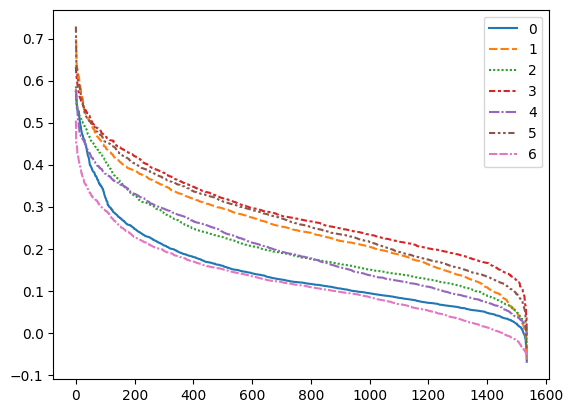

In [23]:
sims = []
for key in query_keys:
    sims.append([s[0] for s in similarity_results[key]])
sns.lineplot(sims)

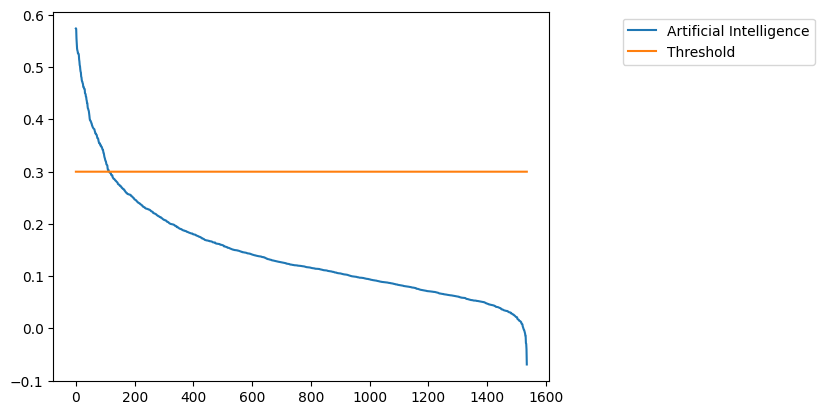

In [24]:
# determine thresholds
key=query_keys[0]
test_sims = [s[0] for s in similarity_results[key]]

plt.plot(test_sims, label=key)
plt.plot([query_thresholds[key]]*len(test_sims), label='Threshold')
plt.legend(bbox_to_anchor=(1.55, 1.0))

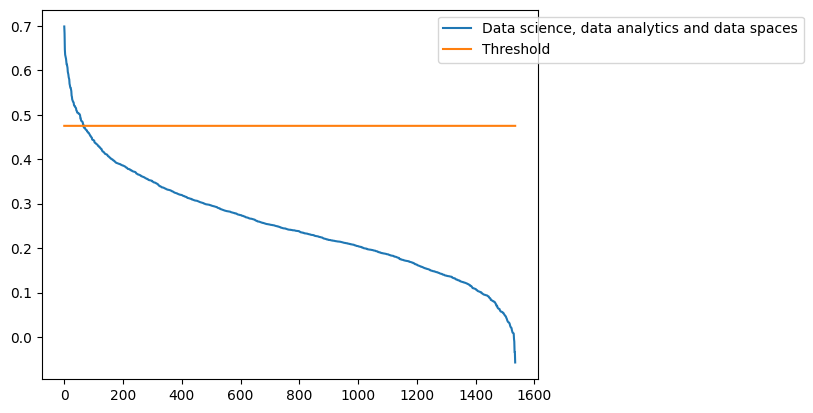

In [25]:
# determine thresholds
key=query_keys[1]
test_sims = [s[0] for s in similarity_results[key]]

plt.plot(test_sims, label=key)
plt.plot([query_thresholds[key]]*len(test_sims), label='Threshold')
plt.legend(bbox_to_anchor=(1.55, 1.0))

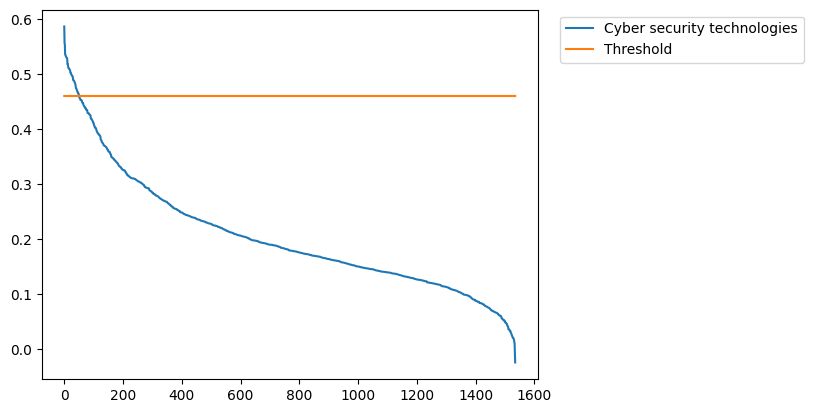

In [26]:
# determine thresholds
key=query_keys[2]
test_sims = [s[0] for s in similarity_results[key]]

plt.plot(test_sims, label=key)
plt.plot([query_thresholds[key]]*len(test_sims), label='Threshold')
plt.legend(bbox_to_anchor=(1.55, 1.0))

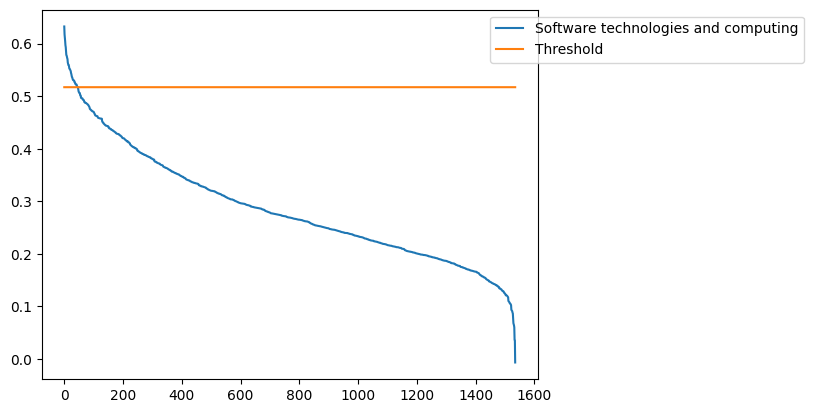

In [27]:
# determine thresholds
key=query_keys[3]
test_sims = [s[0] for s in similarity_results[key]]

plt.plot(test_sims, label=key)
plt.plot([query_thresholds[key]]*len(test_sims), label='Threshold')
plt.legend(bbox_to_anchor=(1.55, 1.0))

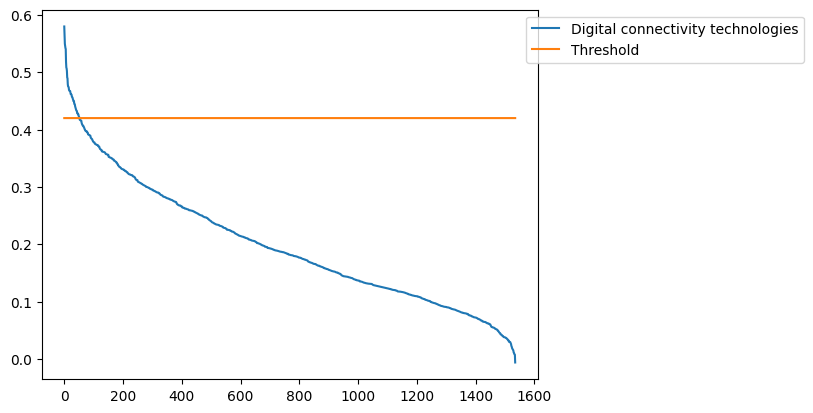

In [28]:
# determine thresholds
key=query_keys[4]
test_sims = [s[0] for s in similarity_results[key]]

plt.plot(test_sims, label=key)
plt.plot([query_thresholds[key]]*len(test_sims), label='Threshold')
plt.legend(bbox_to_anchor=(1.55, 1.0))

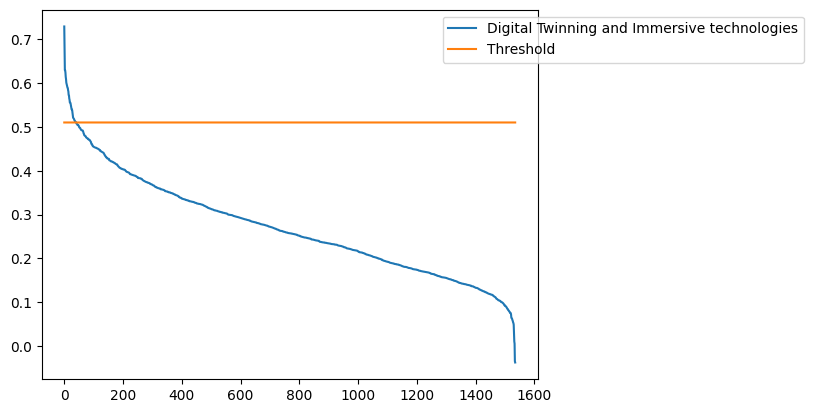

In [29]:
# determine thresholds
key=query_keys[5]
test_sims = [s[0] for s in similarity_results[key]]

plt.plot(test_sims, label=key)
plt.plot([query_thresholds[key]]*len(test_sims), label='Threshold')
plt.legend(bbox_to_anchor=(1.55, 1.0))

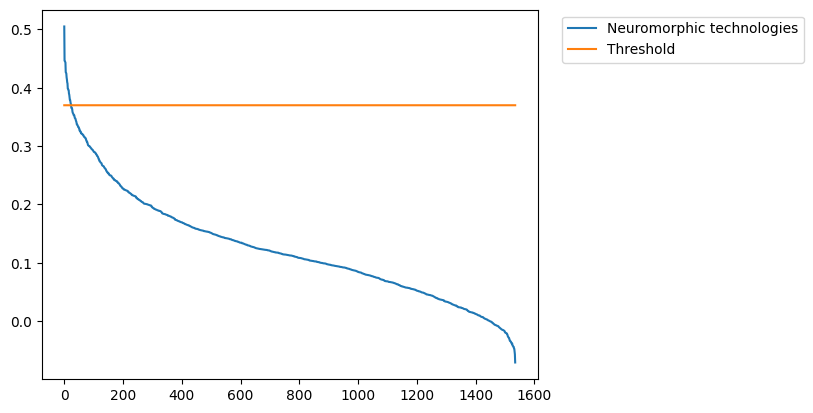

In [30]:
# determine thresholds
key=query_keys[6]
test_sims = [s[0] for s in similarity_results[key]]

plt.plot(test_sims, label=key)
plt.plot([query_thresholds[key]]*len(test_sims), label='Threshold')
plt.legend(bbox_to_anchor=(1.55, 1.0))

In [31]:
key = query_keys[3]
pp(key)
pp({i: v for i, v in enumerate(similarity_results[key])}, width=120)

'Software technologies and computing'
{0: (0.6324859857559204,
     'HORIZON-CL4-2021-DATA-01-08',
     'Roadmap for next generation computing and systems technologies ',
     'https://ec.europa.eu/info/funding-tenders/opportunities/portal/screen/opportunities/topic-details/horizon-cl4-2021-data-01-08'),
 1: (0.6174091100692749,
     'HORIZON-CL4-2024-DIGITAL-EMERGING-01-22',
     'Fundamentals of Software Engineering ',
     'https://ec.europa.eu/info/funding-tenders/opportunities/portal/screen/opportunities/topic-details/horizon-cl4-2024-digital-emerging-01-22'),
 2: (0.6117668747901917,
     'HORIZON-CL4-2024-DIGITAL-EMERGING-01-21',
     'Open Source for Cloud/Edge to support European Digital Autonomy ',
     'https://ec.europa.eu/info/funding-tenders/opportunities/portal/screen/opportunities/topic-details/horizon-cl4-2024-digital-emerging-01-21'),
 3: (0.6046492457389832,
     'HORIZON-CL4-2022-HUMAN-01-03',
     'Internet architecture and decentralised technologies ',
     'https

In [32]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [33]:
mask = [s.split('-')[1] in ['HLTH', 'CL2', 'CL3', 'CL4', 'CL5', 'CL6'] for s in test_keys]
test=np.array([v for v,m in zip(corpus_vals, mask) if m])
test_pca = PCA(n_components=50).fit_transform(test)
test_embed = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(test_pca)

In [34]:
x,y=zip(*test_embed)
df=pd.DataFrame()
df["comp-1"]=x
df["comp-2"]=y

In [35]:
destinations = [(1 if s.split('-')[1]=='HLTH' else int(s.split('-')[1][2]),s.split('-')[3]) for s in [k for k,m in zip(test_keys, mask) if m]]
dest_key = {}
for d in set([de[0] for de in destinations]):
    temp = sorted(list(set([df[1].upper() for df in destinations if df[0]==d])))
    print(temp)
    dest_key[d]={}
    for i,t in enumerate(temp):
        dest_key[d][t]=i+1
dest_key

['CARE', 'CORONA', 'DISEASE', 'ENVHLTH', 'IND', 'STAYHLTH', 'TOOL']
['DEMOCRACY', 'HERITAGE', 'TRANSFORMATIONS']
['BM', 'CS', 'DRS', 'FCT', 'INFRA', 'SSRI']
['DATA', 'DIGITAL', 'HUMAN', 'RESILIENCE', 'SPACE', 'TWIN']
['D1', 'D2', 'D3', 'D4', 'D5', 'D6']
['BIODIV', 'CIRCBIO', 'CLIMATE', 'COMMUNITIES', 'FARM2FORK', 'GOVERNANCE', 'ZEROPOLLUTION']


{1: {'CARE': 1,
  'CORONA': 2,
  'DISEASE': 3,
  'ENVHLTH': 4,
  'IND': 5,
  'STAYHLTH': 6,
  'TOOL': 7},
 2: {'DEMOCRACY': 1, 'HERITAGE': 2, 'TRANSFORMATIONS': 3},
 3: {'BM': 1, 'CS': 2, 'DRS': 3, 'FCT': 4, 'INFRA': 5, 'SSRI': 6},
 4: {'DATA': 1,
  'DIGITAL': 2,
  'HUMAN': 3,
  'RESILIENCE': 4,
  'SPACE': 5,
  'TWIN': 6},
 5: {'D1': 1, 'D2': 2, 'D3': 3, 'D4': 4, 'D5': 5, 'D6': 6},
 6: {'BIODIV': 1,
  'CIRCBIO': 2,
  'CLIMATE': 3,
  'COMMUNITIES': 4,
  'FARM2FORK': 5,
  'GOVERNANCE': 6,
  'ZEROPOLLUTION': 7}}

[Text(0.5, 1.0, 'HORIZON EUROPE CLUSTERS')]

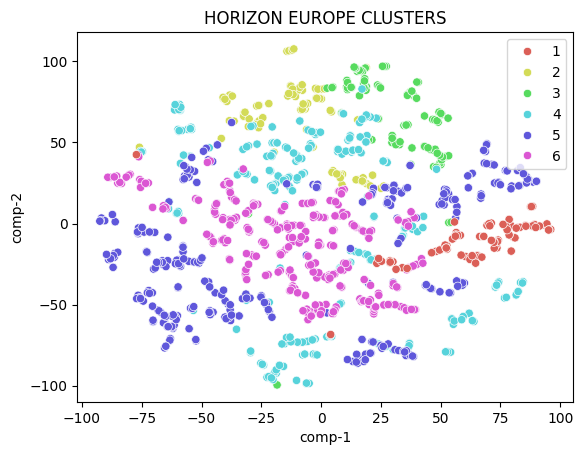

In [36]:
hues_clust = [1 if s.split('-')[1]=='HLTH' else int(s.split('-')[1][2]) for s in [k for k,m in zip(test_keys, mask) if m]]
sns.scatterplot(x="comp-1", y="comp-2", hue=hues_clust,
                palette=sns.color_palette("hls", len(set(hues_clust))),
                data=df).set(title="HORIZON EUROPE CLUSTERS") 

[Text(0.5, 1.0, 'HORIZON EUROPE CLUSTERS')]

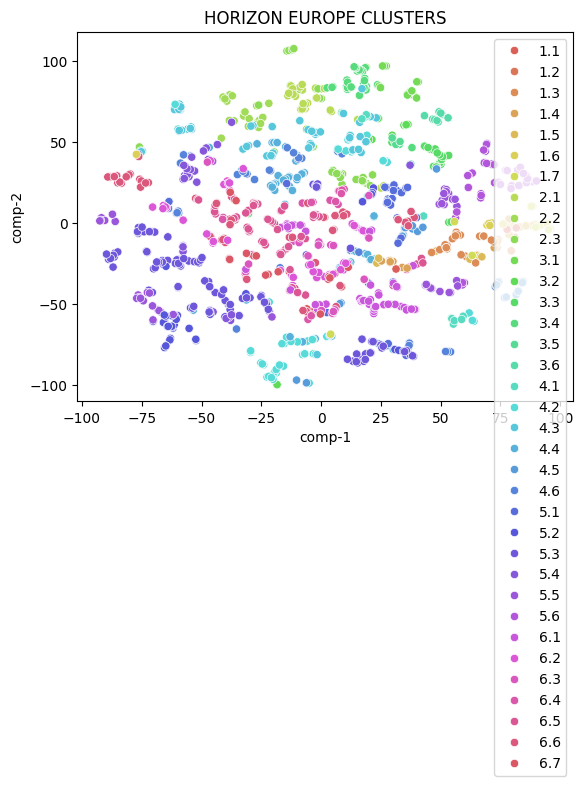

In [37]:
hues = [(1 if s.split('-')[1]=='HLTH' else int(s.split('-')[1][2]),s.split('-')[3]) for s in [k for k,m in zip(test_keys, mask) if m]]
hues_str = [(h[0], h[1].upper()) for h in hues]
hues_num = [round(h[0]+0.1*dest_key[h[0]][h[1].upper()],1) for h in hues]
sns.scatterplot(x="comp-1", y="comp-2", hue=hues_num,
                palette=sns.color_palette("hls", len(set(hues_num))),
                data=df).set(title="HORIZON EUROPE CLUSTERS") 
# note decimals do not correspond to numbered destinations, I do not have ready access to those numbers so I just sorted them alphabetically

[Text(0.5, 1.0, 'HORIZON EUROPE CLUSTERS')]

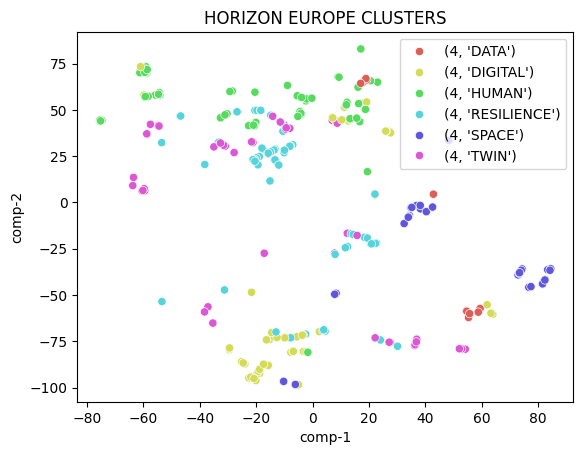

In [38]:
hues = [h if h[0]==4 else None for h in hues_str]
sns.scatterplot(x="comp-1", y="comp-2", hue=hues,
                palette=sns.color_palette("hls", len(set(hues))-1),
                data=df).set(title="HORIZON EUROPE CLUSTERS")